In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
[pd.api.types.is_integer_dtype(t) for t in train.dtypes]

[True, True, True, False, False, False, True, True, False, False, False, False]

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
train.loc[train.Embarked.isnull(), 'Embarked'] = 'S'
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
train.loc[[61, 829], 'Embarked']
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [8]:
X = train.copy()
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# https://www.kaggle.com/ksvmuralidhar/columntransformer-pipeline-simplified
columns_tranformer = ColumnTransformer(
    transformers = [('mage',  SimpleImputer(strategy = 'median'), [5]),],
    remainder = "passthrough",
)

X = columns_tranformer.fit_transform(X)
X = pd.DataFrame(X)
X.head()

# Columns name would be missing

,0,1,2,3,4,5,6,7,8,9,10,11
0,22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.25,NaN,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.925,NaN,S
3,35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1,C123,S
4,35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.05,NaN,S


In [9]:
print(train.Age[5])
X = train.copy()
X.Age.fillna(X.Age.mean(), inplace = True)
X.Age.isnull().sum()

nan


0

In [10]:
train.Age.fillna(train.Age.mean(), inplace = True)

In [11]:
X = train.copy()
# https://stackoverflow.com/questions/30244952/how-do-i-create-a-new-column-from-the-output-of-pandas-groupby-sum
X['TicketSize'] = X['Ticket'].groupby(X['Ticket']).transform('size')
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
X['FarePer'] = X['Fare'] / X['TicketSize']
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketSize,FarePer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.0500


In [13]:
def compute_fareper(X):
    X = X.copy()
    X['TicketSize'] = X['Ticket'].groupby(X['Ticket']).transform('size')
    X['FarePer'] = X['Fare'] / X['TicketSize']
    X.pop('TicketSize')
    
    return X


train = compute_fareper(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FarePer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    X = (X - X.mean(axis = 0)) / X.std(axis = 0)
    for colname in X.select_dtypes(["object"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

X = train.copy()
X.pop('Cabin')
X.pop('Fare')
X.pop('Name')
y = X.pop('Survived')
mi_scores = make_mi_scores(X, y)
mi_scores.head(5)

FarePer        0.141182
Pclass         0.064762
Age            0.033885
SibSp          0.016195
PassengerId    0.013349
Name: MI Scores, dtype: float64

In [15]:
features = ['FarePer', 'SibSp', 'Pclass', 'Parch', 'Age']
X = train.copy()
X = X.loc[:, features]

X.head(5)

,FarePer,SibSp,Pclass,Parch,Age
0,7.2500,1,3,0,22.0
1,71.2833,1,1,0,38.0
2,7.9250,0,3,0,26.0
3,26.5500,1,1,0,35.0
4,8.0500,0,3,0,35.0


In [16]:
from sklearn.decomposition import PCA

def apply_pca(X, standardize = True):
    if standardize:
        X = (X - X.mean(axis = 0)) / X.std(axis = 0)
        
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns = component_names)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns = component_names,
        index = X.columns,
    )
    
    return pca, X_pca, loadings

pca, X_pca, loadings = apply_pca(X)

In [17]:
loadings

,PC1,PC2,PC3,PC4,PC5
FarePer,0.545288,0.377896,0.331784,-0.006843,0.670617
SibSp,-0.279586,0.591632,-0.221435,-0.723018,-0.003877
Pclass,-0.606299,-0.276453,-0.157070,0.052441,0.727017
Parch,-0.200075,0.632403,-0.296607,0.685905,-0.039935
Age,0.465687,-0.175517,-0.853369,-0.063103,0.141804


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

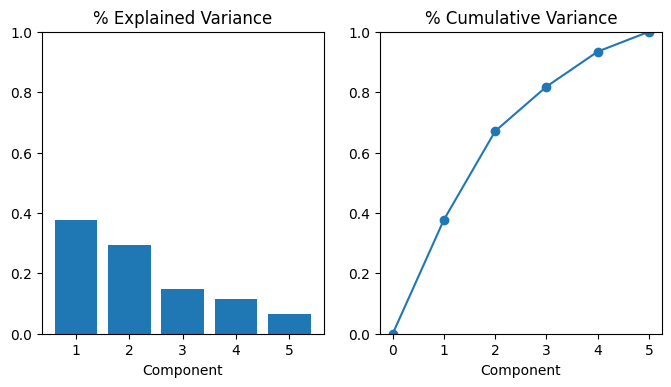

In [34]:
import matplotlib.pyplot as plt

def plot_variance(pca, widht = 8, dpi = 100):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel = "Component",
        title = "% Explained Variance",
        ylim = (0.0, 1.0),
    )
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel = "Component",
        title = "% Cumulative Variance",
        ylim = (0.0, 1.0),
    )
    fig.set(figwidth = 8, dpi = 100)
    return axs

plot_variance(pca)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FarePer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [19]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FarePer        float64
dtype: object

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

def score_dataset(X, y, model = XGBClassifier(eval_metric = 'logloss')):
    for colname in X.select_dtypes(["object"]):
        X[colname], _ = X[colname].factorize()
    score = cross_val_score(
        model, X, y, cv = 5, scoring = "accuracy",
    )    
    return score.mean()

X = train.copy()
X.pop('PassengerId')
X.pop('Name')
X.pop('Ticket')
X.pop('Cabin')
y = X.pop('Survived')
score_dataset(X, y)

0.8047329106772958

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FarePer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [32]:
X = train.copy()
X.pop('PassengerId')
X.pop('Name')
X.pop('Ticket')
X.pop('Cabin')
y = X.pop('Survived')

X.Age = (X.Age - X.Age.mean(axis = 0)) / X.Age.std(axis = 0)
X.FarePer = (X.FarePer - X.FarePer.mean(axis = 0)) / X.FarePer.std(axis = 0)
X.Pclass = (X.Pclass - X.Pclass.mean(axis = 0)) / X.Pclass.std(axis = 0)

X["Feature1"] = X.Age + X.FarePer - X.Pclass
# X["Feature2"] = X.Age * X.FarePer
X.head()
# X
# X["Feature1"] = X.
score_dataset(X, y)

0.8069989328981233

In [33]:
X = train.copy()
X.pop('PassengerId')
X.pop('Name')
X.pop('Ticket')
X.pop('Cabin')
y = X.pop('Survived')

X = X.join(X_pca)
score_dataset(X, y)

0.7991274872889336

In [35]:
X = train.copy()
X.pop('PassengerId')
X.pop('Name')
X.pop('Ticket')
X.pop('Cabin')
y = X.pop('Survived')

X["Feature1"] = X.Age ** 2
score_dataset(X, y)

0.8047329106772958

In [ ]:
# Reference

[](https://www.kaggle.com/ryanholbrook/principal-component-analysis)